In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_hdf('open30.h5') # pick just a single brick

In [4]:
train.head(2)

,TX,TY,X,Y,Z,event_id,signal,data_ind
0,-0.248382,0.072824,37014.070312,38318.898438,31032.0,-999.0,0.0,21
1,0.768548,0.490205,46626.425781,15151.117188,72408.0,188918.0,1.0,21


In [5]:
train_signal = train[train['signal']==1]
train_signal.signal.value_counts()

signal
1.0    169203
Name: count, dtype: int64

In [6]:
train_signal.fillna(0, inplace=True)


/var/folders/0l/sng3x95j6mn11wb0_x0fk63r0000gp/T/ipykernel_48936/4114212449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_signal.fillna(0, inplace=True)


In [7]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [8]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(train_signal)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
k = [inertias.index(i) for i in inertias]

/Users/prashantmudgal/env_q/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/prashantmudgal/env_q/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/prashantmudgal/env_q/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/prashantmudgal/env_q/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

Text(0, 0.5, 'Inertia')

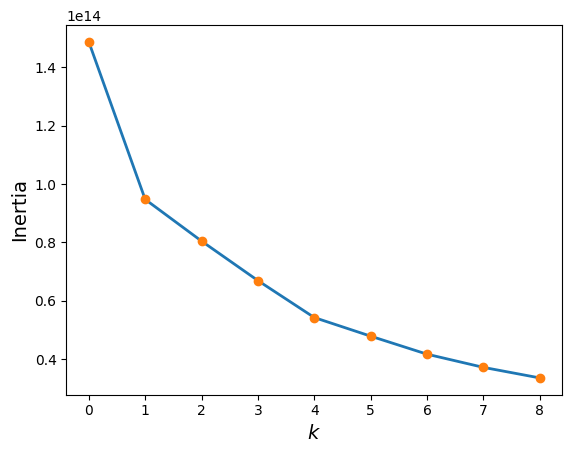

In [9]:
plt.plot(k, inertias, linewidth=2.0)
line, = plt.plot(k, inertias, 'o')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

In [10]:
kmeans = KMeans(n_clusters=6, random_state=42).fit(train_signal)
clustering_labels = kmeans.labels_

/Users/prashantmudgal/env_q/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
clustering_labels.shape, train_signal.shape


((169203,), (169203, 8))

In [12]:
clusters = train_signal
clusters['cluster'] = clustering_labels

/var/folders/0l/sng3x95j6mn11wb0_x0fk63r0000gp/T/ipykernel_48936/2635706698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusters['cluster'] = clustering_labels


In [23]:
X_sample = train_signal.sample(frac=0.02, random_state=42)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


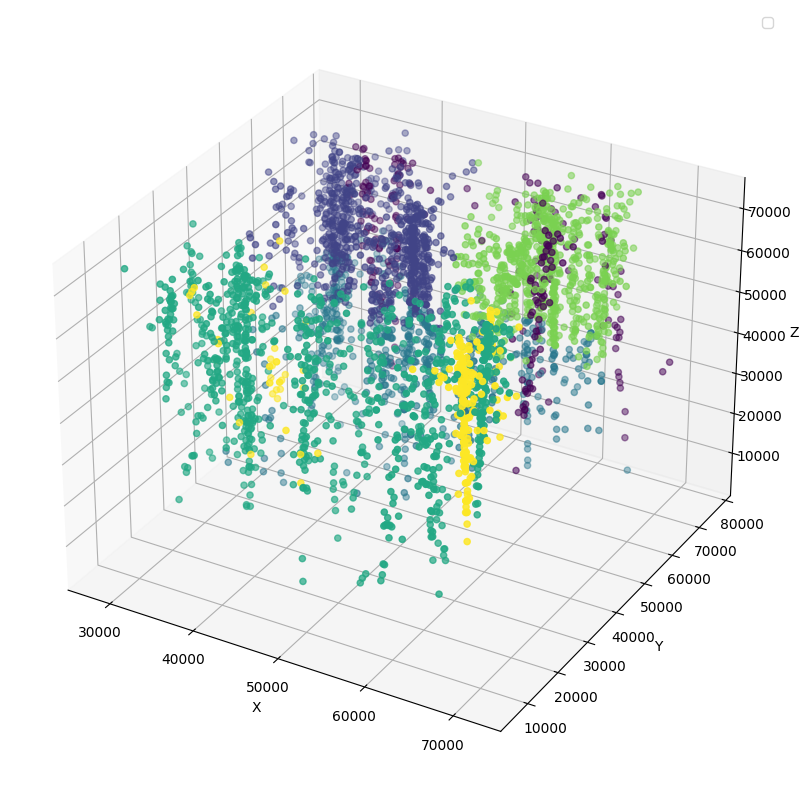

In [24]:

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_sample.X, X_sample.Y, X_sample.Z, c=X_sample.cluster)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

In [15]:
X_sample

,TX,TY,X,Y,Z,event_id,signal,data_ind,cluster
5410468,0.002145,0.119677,48731.390625,14814.876953,56892.0,192496.0,1.0,28,3
4935046,-0.007864,-0.525081,48614.058594,12562.824219,40083.0,192496.0,1.0,28,3
5565906,-0.090395,0.412283,56607.847656,64845.160156,56892.0,180226.0,1.0,28,4
3479336,0.156126,0.191004,44675.714844,51996.238281,25860.0,194508.0,1.0,25,2
3898832,-0.003581,0.032132,58872.746094,65968.921875,67236.0,184544.0,1.0,26,4
...,...,...,...,...,...,...,...,...,...
5137503,-0.128987,0.241370,30534.203125,66713.828125,49134.0,189561.0,1.0,28,1
4838964,0.100389,0.129620,58840.324219,50630.019531,67236.0,197564.0,1.0,27,4
636192,0.113232,0.081652,61849.156250,63958.617188,54306.0,186997.0,1.0,21,4
3338141,0.086128,-0.191806,66401.273438,55789.796875,36204.0,193407.0,1.0,25,2
